In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

In [53]:
df=pd.read_csv("D:/Mall_Customers.csv")
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [55]:
numeric_features = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
standardized_df = scaler.fit_transform(numeric_features)

In [57]:
kmeans = KMeans(n_clusters=3,random_state=42)
df['Cluster'] = kmeans.fit_predict(standardized_df)

C:\Users\indum\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [59]:
z = linkage(standardized_df, method='ward')
df['Cluster'] = fcluster(z, 3, criterion='maxclust')

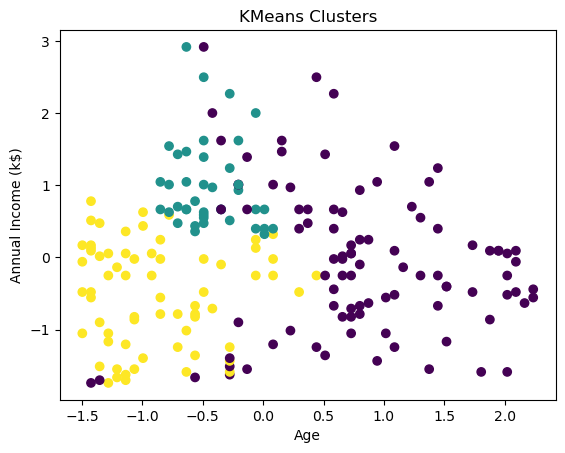

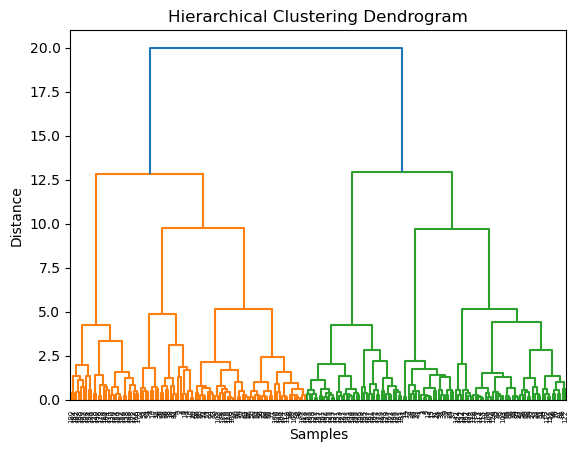

In [65]:
plt.scatter(standardized_df[:, 0], standardized_df[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('KMeans Clusters')
plt.show()

dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [67]:
kmeans_silhouette = silhouette_score(standardized_df, df['Cluster'])
hierarchical_silhouette = silhouette_score(standardized_df, df['Cluster'])

In [69]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().rename(index={0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'})

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
Cluster 2,49.915789,59.063158,32.515789
Cluster 3,32.692308,86.538462,82.128205
3,26.560606,47.363636,56.787879
